# Getting started with the network diffusion tutorial in Julia

The `setup.jl` script that we include below does a few things to install 
packages that we will need including the `MatrixNetworks.jl` package that
Huda Nassar has been building to make working with graphs easy in Julia
(in a way that interoperates with matrix operations).

It also configures a few plotting packages `PyPlot` and `Gadfly`

In [5]:
include("setup.jl")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Gadfly
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Cloning cache of Interact from git://github.com/JuliaLang/Interact.jl.git
INFO: Cloning cache of Reactive from git://github.com/JuliaLang/Reactive.jl.git
INFO: Installing Interact v0.2.1
INFO: Installing Reactive v0.2.4
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of Interact
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Cloning MatrixNetworks from https://github.com/nassarhuda/MatrixNetworks.jl.git


LoadError: LoadError: LoadError: MatrixNetworks already exists
while loading /Users/dgleich/Dropbox/lectures/diffusion-tutorial/setup.jl, in expression starting on line 4
while loading In[5], in expression starting on line 1

Now we are going to test the packages themselves to make sure things are working. If this step fails, many of the other ideas will not work either.

In [3]:
using MatrixNetworks
using PyPlot
using Gadfly
using Compose
using Interact



LoadError: LoadError: ArgumentError: Interact not found in path
while loading In[3], in expression starting on line 5

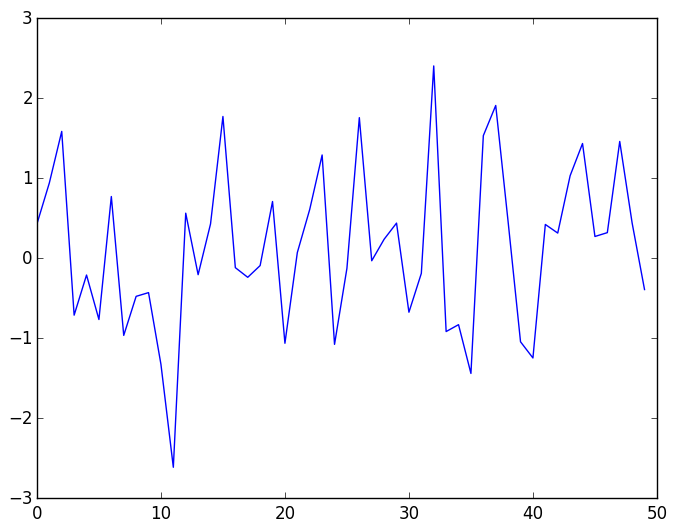

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3125c5210>

In [4]:
PyPlot.plot(randn(50))

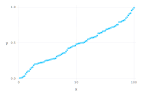

In [5]:
# E.g.
Gadfly.plot(x=collect(1:100), y=sort(rand(100)))

Interact.Slider{Float64}([Reactive.Input{Float64}] 6.283185307179586,"phi",6.283185307179586,0.0:0.19634954084936207:12.566370614359172)

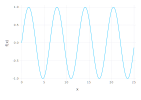

In [9]:
@manipulate for phi=0:pi/16:4*pi
    Gadfly.plot(x -> sin(x + phi), 0, 25)
end    

In [14]:
matrix_network_datasets()
(A,xy) = load_matrix_network_metadata("bfs_example")

(
8x8 sparse matrix with 18 Int64 entries:
	[2, 1]  =  1
	[5, 1]  =  1
	[1, 2]  =  1
	[6, 2]  =  1
	[4, 3]  =  1
	[6, 3]  =  1
	[7, 3]  =  1
	[3, 4]  =  1
	[8, 4]  =  1
	[1, 5]  =  1
	[2, 6]  =  1
	[3, 6]  =  1
	[7, 6]  =  1
	[3, 7]  =  1
	[6, 7]  =  1
	[8, 7]  =  1
	[4, 8]  =  1
	[7, 8]  =  1,

8x2 Array{Float64,2}:
 0.0  1.0
 1.0  1.0
 2.0  1.0
 3.0  1.0
 0.0  0.0
 1.0  0.0
 2.0  0.0
 3.0  0.0,

1x1 Array{Any,2}:
 "rstuvwxy")

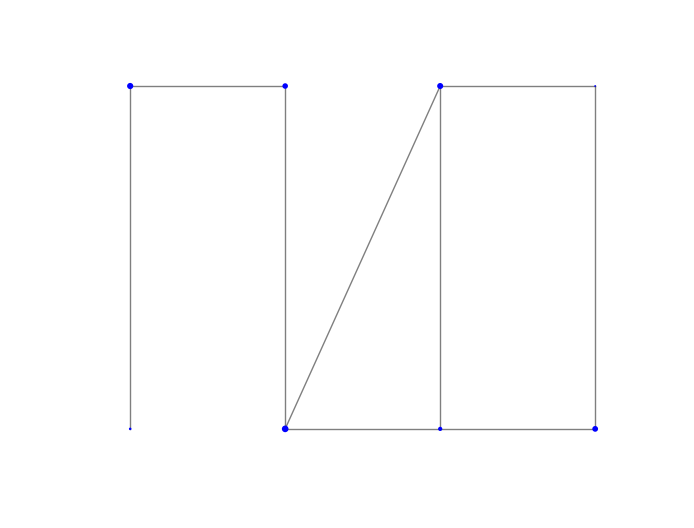

PyObject <matplotlib.collections.PathCollection object at 0x7f889525bd90>

In [120]:
function graphplot(A,xy)
    (ei,ej) = findnz(triu(A))
    lx = [xy[ei,1]';xy[ej,1]';NaN*ones(1,length(ei))]
    ly = [xy[ei,2]';xy[ej,2]';NaN*ones(1,length(ei))]
    lines = PyPlot.plot(lx,ly)
    PyPlot.axis("off")
    PyPlot.setp(lines,alpha=0.5,color=[0.,0.,0.],zorder=0)
end
graphplot(A,xy)
PyPlot.scatter(xy[:,1],xy[:,2],25*rand(size(A,1)),edgecolors="none",zorder=2)

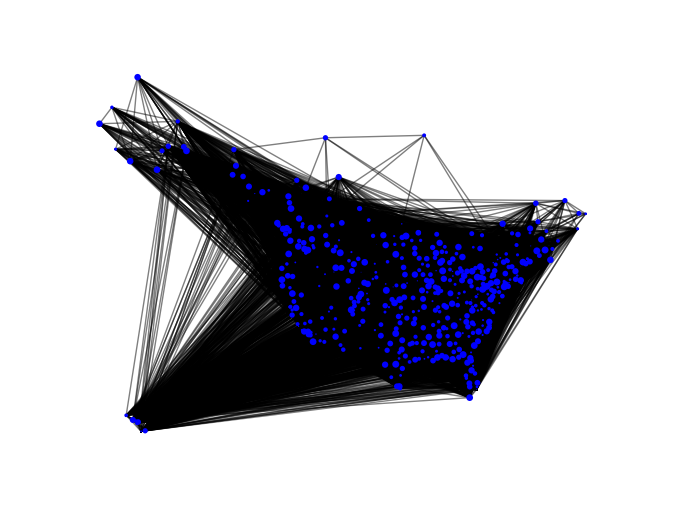

PyObject <matplotlib.collections.PathCollection object at 0x7f8846060d50>

In [127]:
(A,xy) = load_matrix_network_metadata("airports")
graphplot(A,xy)
PyPlot.scatter(xy[:,1],xy[:,2],25*rand(size(A,1)),edgecolors="none",zorder=2)

glines = Any[[(0.0,1.0) (1.0,1.0)] [(2.0,1.0) (3.0,1.0)] [(0.0,1.0) (0.0,0.0)] [(1.0,1.0) (1.0,0.0)] [(2.0,1.0) (1.0,0.0)] [(2.0,1.0) (2.0,0.0)] [(1.0,0.0) (2.0,0.0)] [(3.0,1.0) (3.0,0.0)] [(2.0,0.0) (3.0,0.0)]]

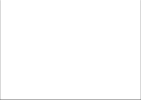


typeof(glines) = Array{Any,2}


In [82]:
(ei,ej) = findnz(triu(A))
glines = [ [(xy[ei[i],1],xy[ei[i],2]), (xy[ej[i],1],xy[ej[i],2])] 
                for i=1:length(ei)]'
#glines = Vector{Vector{Tuple{Float64,Float64}}}()

@show glines
@show typeof(glines)
compose(context(), line(glines), stroke("black"))
#compose(context(), line([[(0,0), (1,1)]; [(0,1), (1,0)]]), stroke("black"))

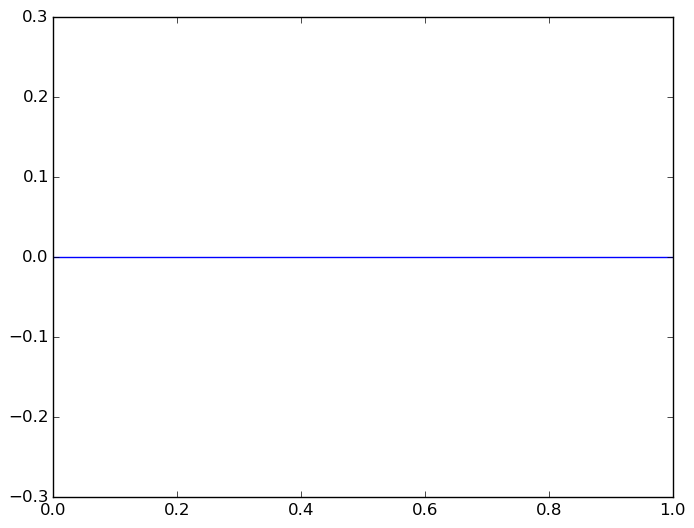

In [123]:
using Gadfly,Reactive,Interact,PyPlot
myfig = figure()
function myplot(data)
    withfig(myfig) do
        PyPlot.plot(data[1], data[2])
        axis([0,1,-.3,.3])
    end
end
x = collect(linspace(0,1,100))
myinput=Input((x,0*x))
lift(myplot, myinput)

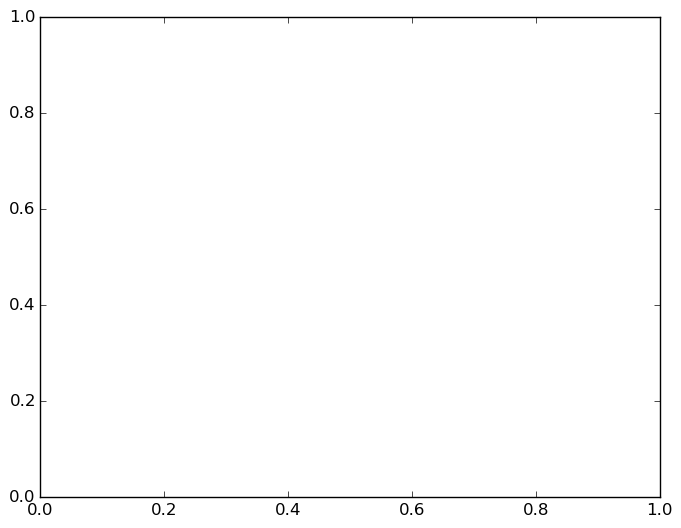

In [125]:
x = collect(linspace(0,1,100))
for t = -1:.1:1
    y = t * x .*(1-x)
    push!(myinput,(x, y))
    sleep(0.25)
end

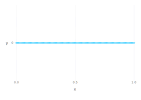

In [99]:
using Gadfly,Reactive,Interact
function myplot2(data)
    Gadfly.plot(x=data[1], y=data[2])
end
x = collect(linspace(0,1,100))
myinput=Input((x,0*x))
lift(myplot2, myinput)

In [100]:
x = collect(linspace(0,1,100))
for t = -1:.1:1
    y = t * x .*(1-x)
    push!(myinput,(x, y))
end